In [101]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Download latest version
path = kagglehub.dataset_download("ziya07/plant-health-data")

print("Path to dataset files:", path)


os.chdir(path)
datasets = list(os.listdir())
datasets

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\ziya07\plant-health-data\versions\1


['plant_health_data.csv']

In [102]:

dataset = pd.read_csv(datasets[0])


dataset.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [103]:
# Getting General Info About about the dataset 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

In [104]:
# Checking if there is any missing data 

dataset.isna().sum()

Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64

In [105]:
# Let see how many plants we have from looking into the plant id's

print("Number of Plants: ",len(dataset['Plant_ID'].unique()))

Number of Plants:  10


Plant_ID
1     120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
Name: count, dtype: int64


Text(0, 0.5, "No of Plant ID's")

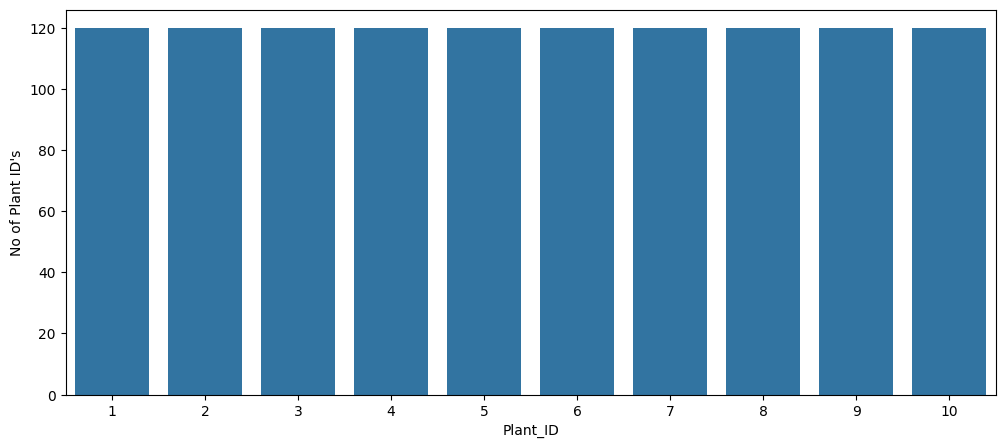

In [106]:
print(dataset['Plant_ID'].value_counts())

# Plant Health Status 

plt.figure(figsize=(12,5))
sns.countplot(x=dataset['Plant_ID'])
plt.ylabel("No of Plant ID's")


In [107]:
dataset["Plant_Health_Status"].value_counts()

Plant_Health_Status
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64

Text(0.5, 0, 'Plants Health Status')

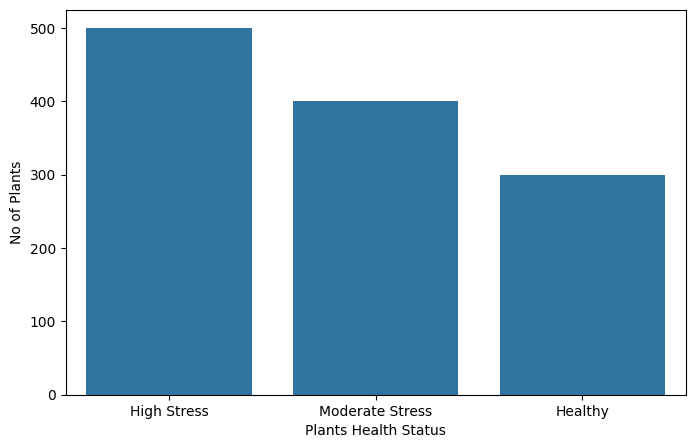

In [108]:

plt.figure(figsize=(8,5))
sns.countplot(x=dataset["Plant_Health_Status"])
plt.ylabel("No of Plants")
plt.xlabel("Plants Health Status")

In [109]:
encoder = LabelEncoder()

data = dataset.copy()
dataset["Plant_Health_Status"] = encoder.fit_transform(dataset["Plant_Health_Status"])

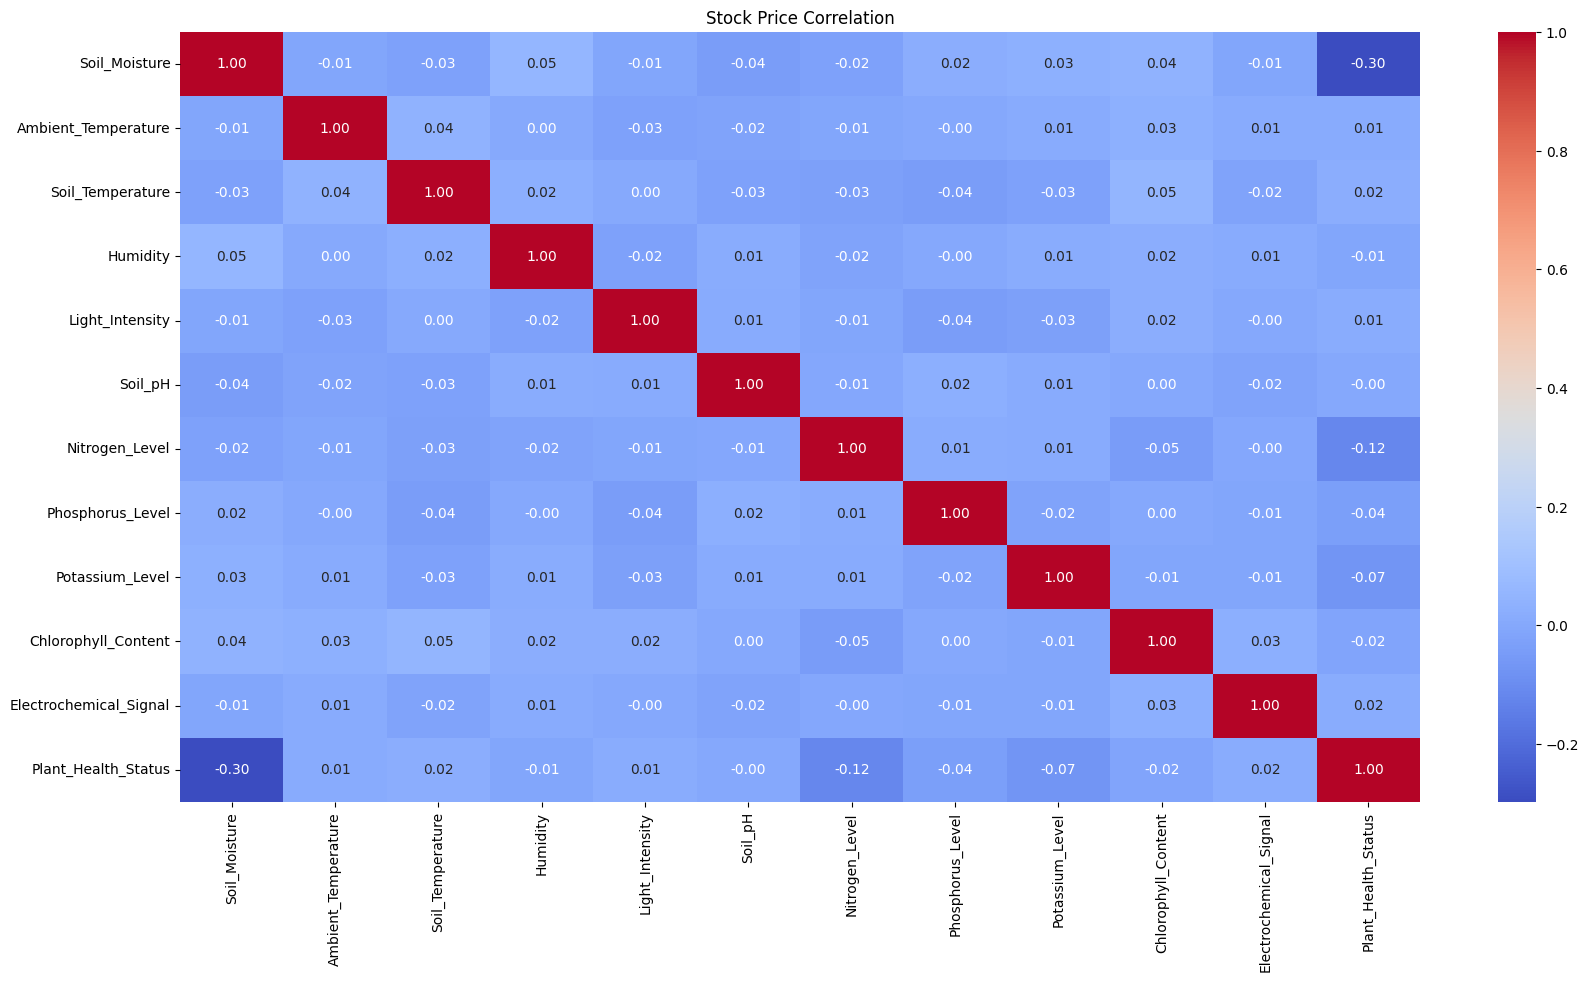

In [110]:
# let chec which feature has the strongest realteion with which stress level
import seaborn as sns

# Calculate correlations
correlation_matrix = dataset.iloc[:,2:].corr()
plt.figure(figsize=(20,10))
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stock Price Correlation')
plt.show()

In [111]:
correlation_matrix

# Compute correlations with the last column
correlation = dataset.iloc[:,2:].corr()['Plant_Health_Status']

# Drop self-correlation for better readability
correlation = correlation.drop('Plant_Health_Status')

# Display sorted correlation values
print(correlation.sort_values(ascending=False))

correlation.values

Soil_Temperature          0.019565
Electrochemical_Signal    0.016194
Light_Intensity           0.011885
Ambient_Temperature       0.010043
Soil_pH                  -0.003037
Humidity                 -0.010071
Chlorophyll_Content      -0.017020
Phosphorus_Level         -0.036100
Potassium_Level          -0.070483
Nitrogen_Level           -0.117730
Soil_Moisture            -0.297279
Name: Plant_Health_Status, dtype: float64


array([-0.29727942,  0.01004325,  0.01956546, -0.01007076,  0.01188508,
       -0.00303663, -0.11773018, -0.0360997 , -0.07048269, -0.01702045,
        0.01619372])

Soil_Temperature (0.019565): Weak positive correlation; barely affects Plant_Health_Status.

Electrochemical_Signal (0.016194): Weak positive correlation; minimal effect.

Light_Intensity (0.011885): Weak positive correlation; minimal effect.

Ambient_Temperature (0.010043): Weak positive correlation; minimal effect.

Soil_pH (-0.003037): Very weak negative correlation; almost no effect.

Humidity (-0.010071): Weak negative correlation; minimal effect.

Chlorophyll_Content (-0.017020): Weak negative correlation; minimal effect.

Phosphorus_Level (-0.036100): Weak negative correlation; minimal effect.

Potassium_Level (-0.070483): Weak negative correlation; slight effect.

Nitrogen_Level (-0.117730): Moderate negative correlation; could slightly affect Plant_Health_Status.

Soil_Moisture (-0.297279): Moderate-to-strong negative correlation; likely a significant factor for Plant_Health_Status.

## **Key Insights**

**Most Significant Feature:**

Soil_Moisture has the strongest (negative) correlation with Plant_Health_Status. This means higher soil moisture is associated with a decline in plant health.

**Least Significant Features:**

Soil_Temperature, Electrochemical_Signal, Light_Intensity, and Ambient_Temperature show negligible correlations and may not significantly influence Plant_Health_Status.

**Actionable Steps:**

Focus on features like Soil_Moisture and Nitrogen_Level for predictive modeling or decision-making.
Consider removing features with near-zero correlations (e.g., Soil_Temperature, Electrochemical_Signal) if dimensionality reduction is required.

<Axes: >

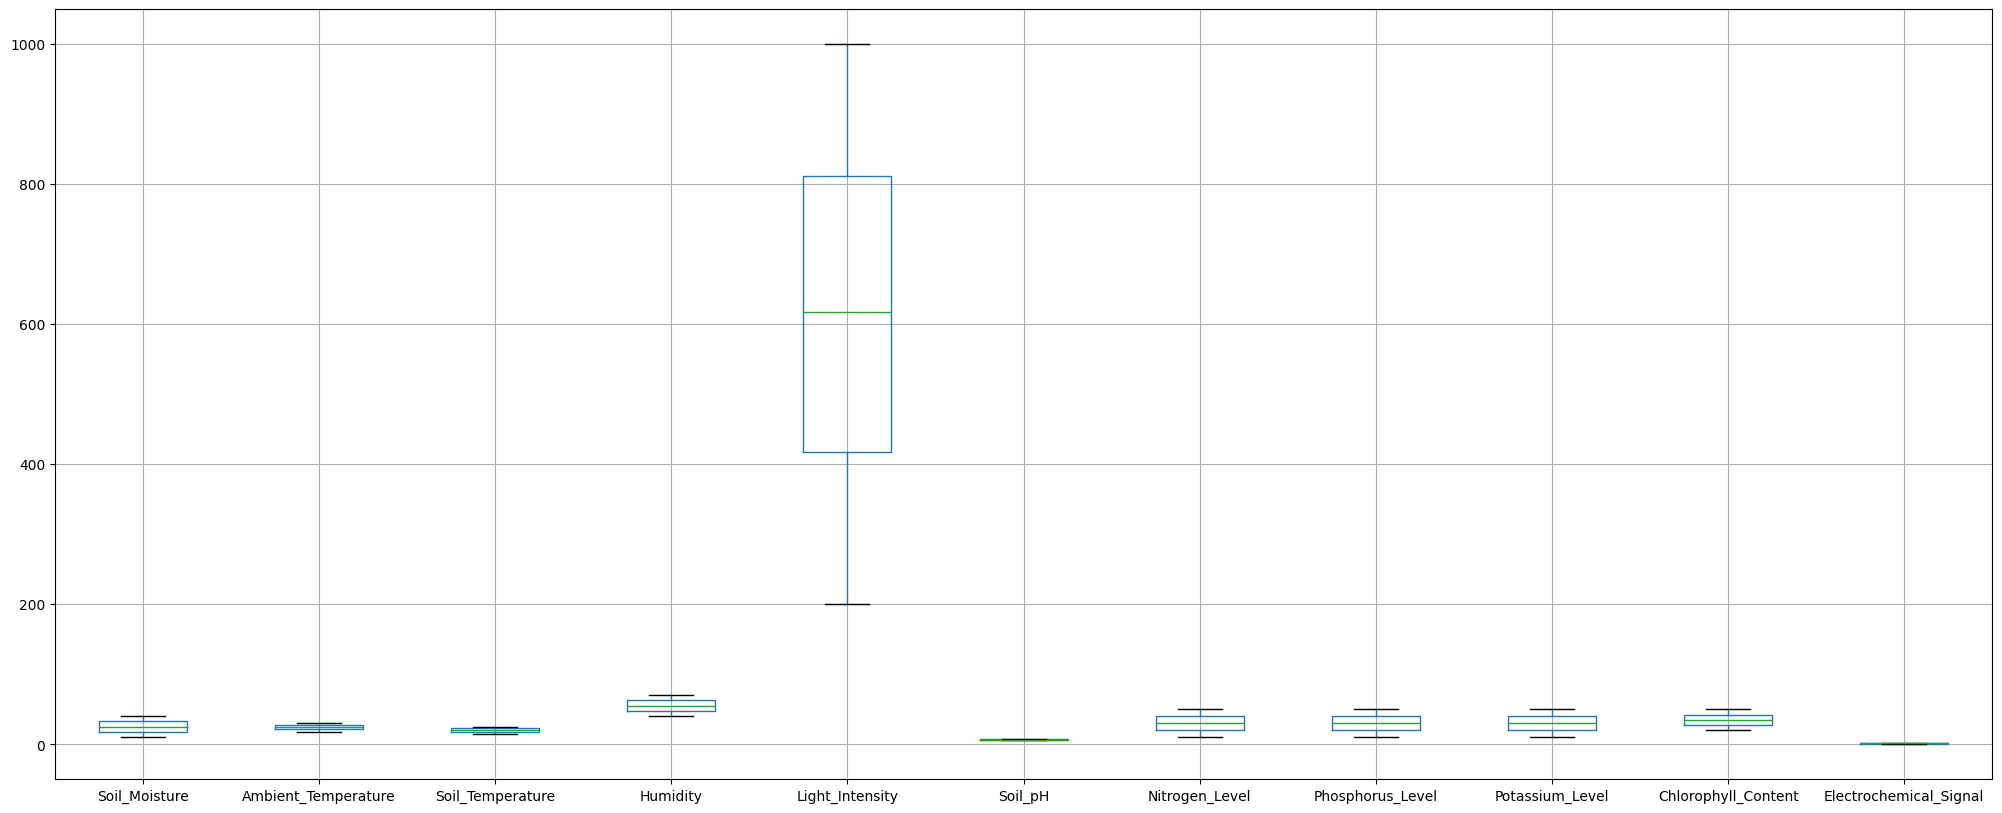

In [112]:
data.iloc[:,2:].boxplot(figsize=(25,10))

In [113]:
avg_data = data.iloc[:,2:].groupby(by="Plant_Health_Status").mean()

avg_data

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_Health_Status,,,,,,,,,,,
Healthy,34.905973,23.966591,19.927555,55.364687,603.462775,6.501287,34.791690,31.403808,31.231902,34.968852,0.965436
High Stress,18.084599,23.975109,19.889501,54.402480,618.668827,6.554605,26.971940,29.655607,30.270283,34.759064,0.997509
Moderate Stress,26.556399,24.053344,20.065495,55.033708,611.957444,6.503080,30.522234,30.174161,29.079865,34.574290,0.992261


<Axes: title={'center': 'Average Level with respect to Plant Health Status'}, xlabel='Plant_Health_Status'>

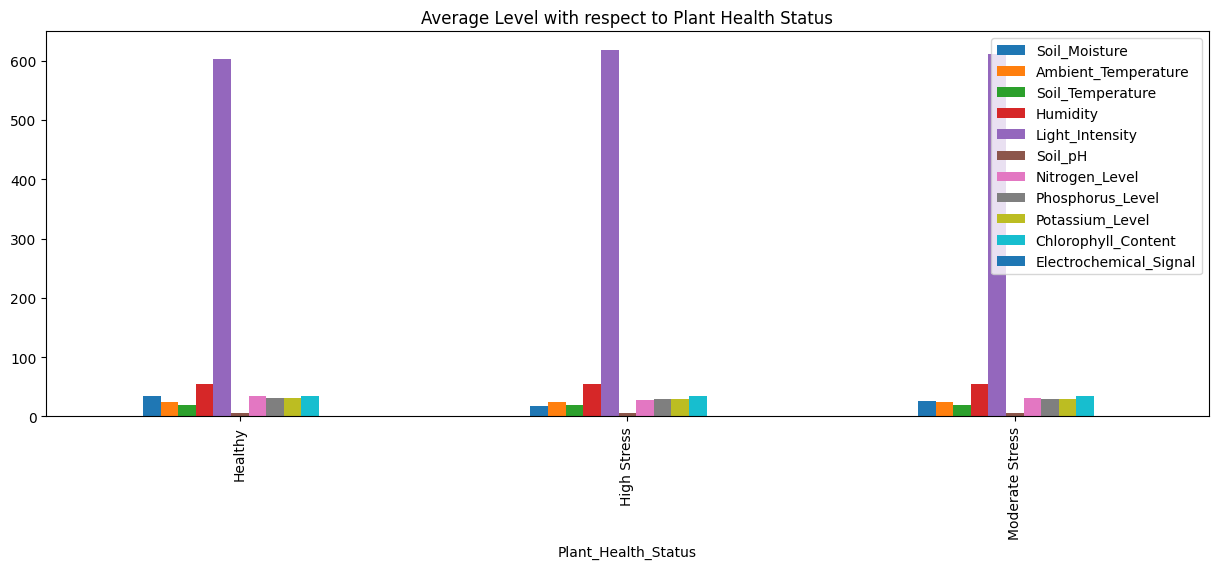

In [114]:

avg_data.plot(kind="bar",figsize=(15,5),title="Average Level with respect to Plant Health Status")

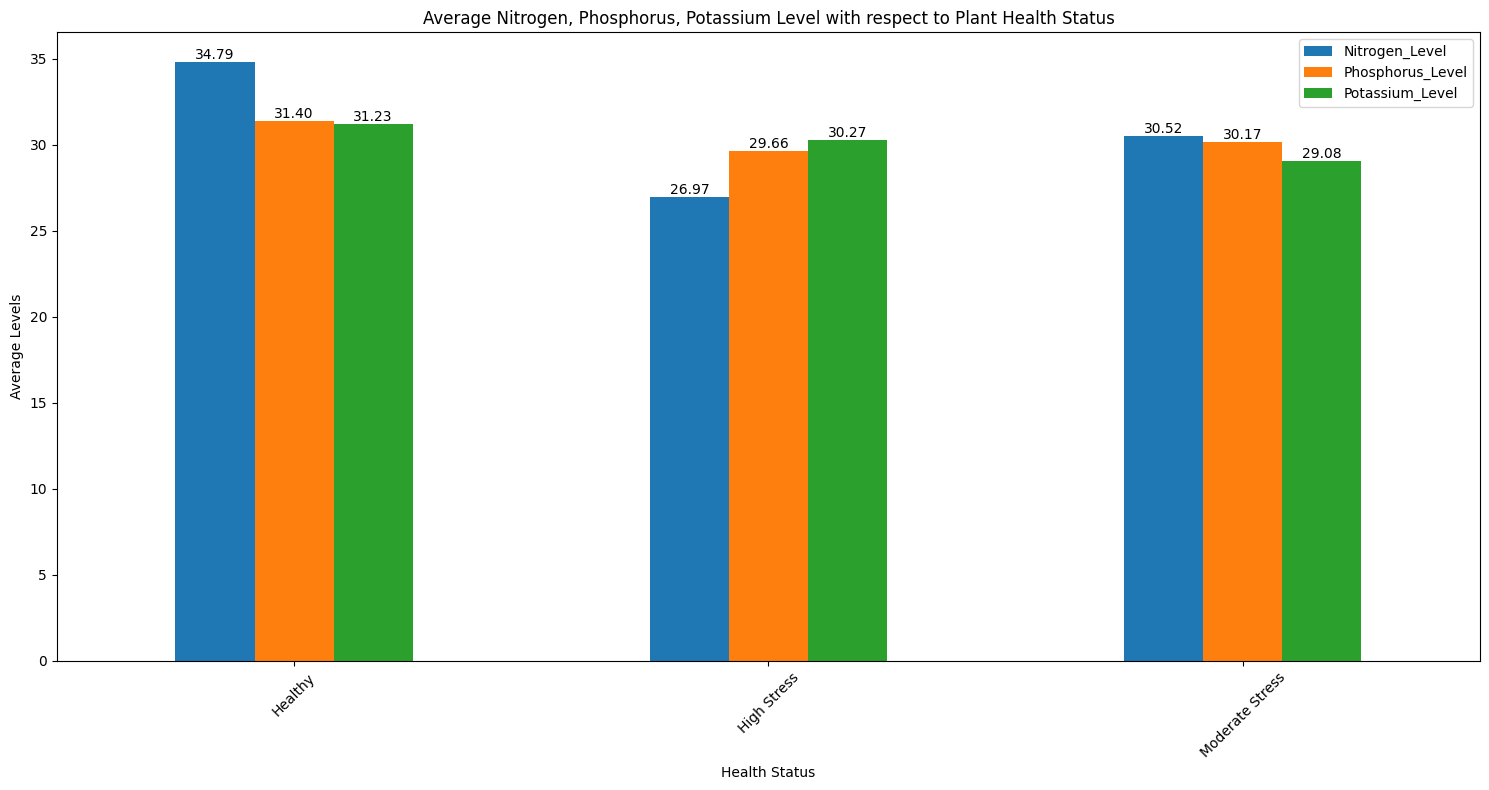

In [115]:

ax =avg_data[["Nitrogen_Level","Phosphorus_Level","Potassium_Level"]].plot(kind="bar",figsize=(15,8),title="Average Nitrogen, Phosphorus, Potassium Level with respect to Plant Health Status")
# Annotating the bars with their values
for container in ax.containers:  # Loop through the bar containers
    ax.bar_label(container, fmt="%.2f")  # Format the label to show 2 decimal places

# Add labels for clarity
plt.xlabel("Health Status")
plt.ylabel("Average Levels")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

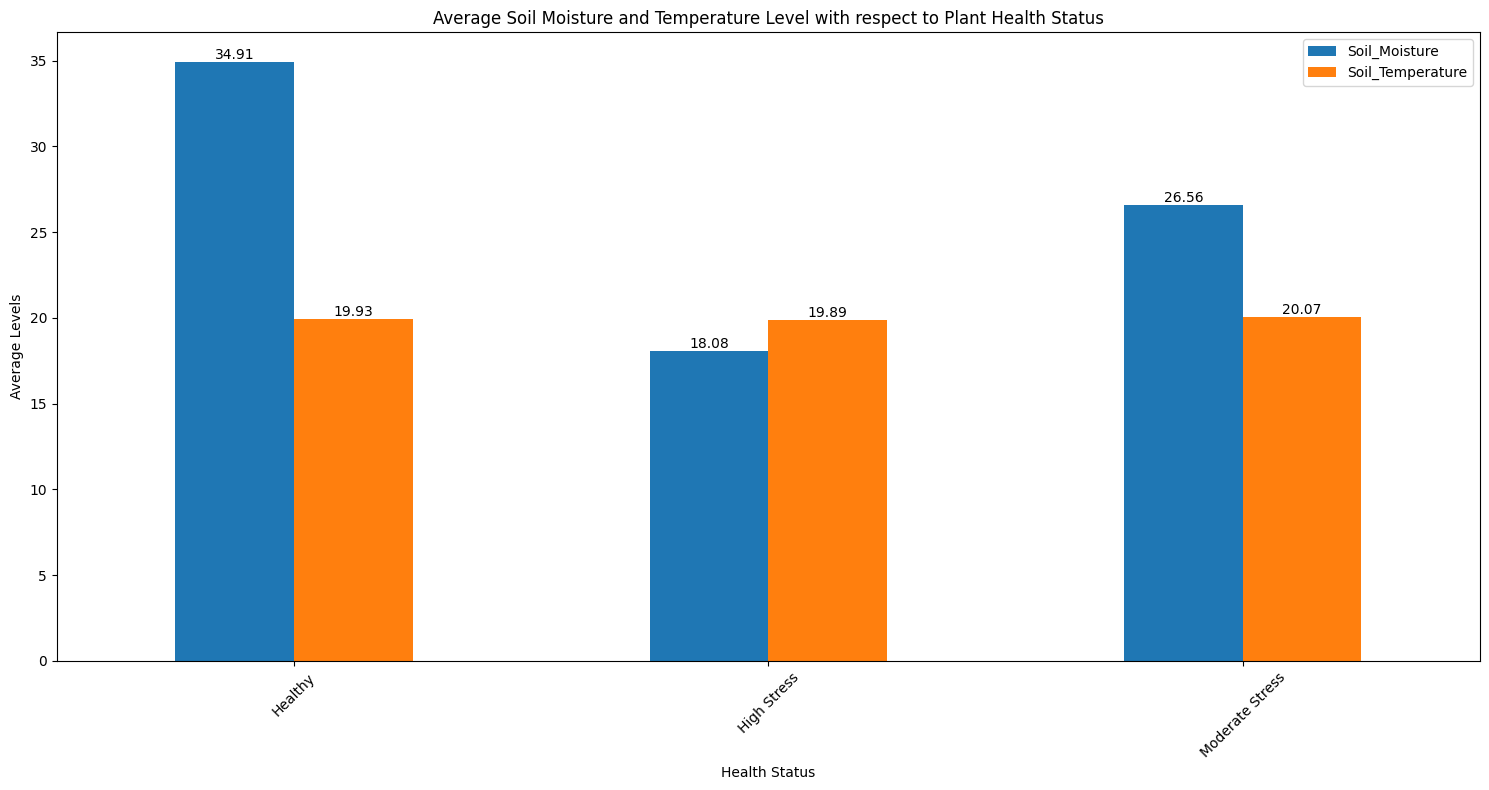

In [116]:

ax = avg_data[["Soil_Moisture","Soil_Temperature"]].plot(kind="bar",figsize=(15,8),title="Average Soil Moisture and Temperature Level with respect to Plant Health Status")

# Annotating the bars with their values
for container in ax.containers:  # Loop through the bar containers
    ax.bar_label(container, fmt="%.2f")  # Format the label to show 2 decimal places

# Add labels for clarity
plt.xlabel("Health Status")
plt.ylabel("Average Levels")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [117]:
max_data = data.iloc[:,2:].groupby(by="Plant_Health_Status").max()
max_data

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_Health_Status,,,,,,,,,,,
Healthy,39.947928,29.990886,24.995929,69.812820,996.073556,7.497374,49.951136,49.980700,49.981945,49.911199,1.992460
High Stress,39.993164,29.967766,24.985652,69.957615,999.660376,7.497823,49.729588,49.976416,49.883189,49.958909,1.996116
Moderate Stress,39.974642,29.979443,24.992921,69.968871,999.856262,7.495422,49.871454,49.974407,49.958752,49.990811,1.994926


<Axes: title={'center': 'Maximum Features Scores with respect to Plant Health Status'}, xlabel='Plant_Health_Status'>

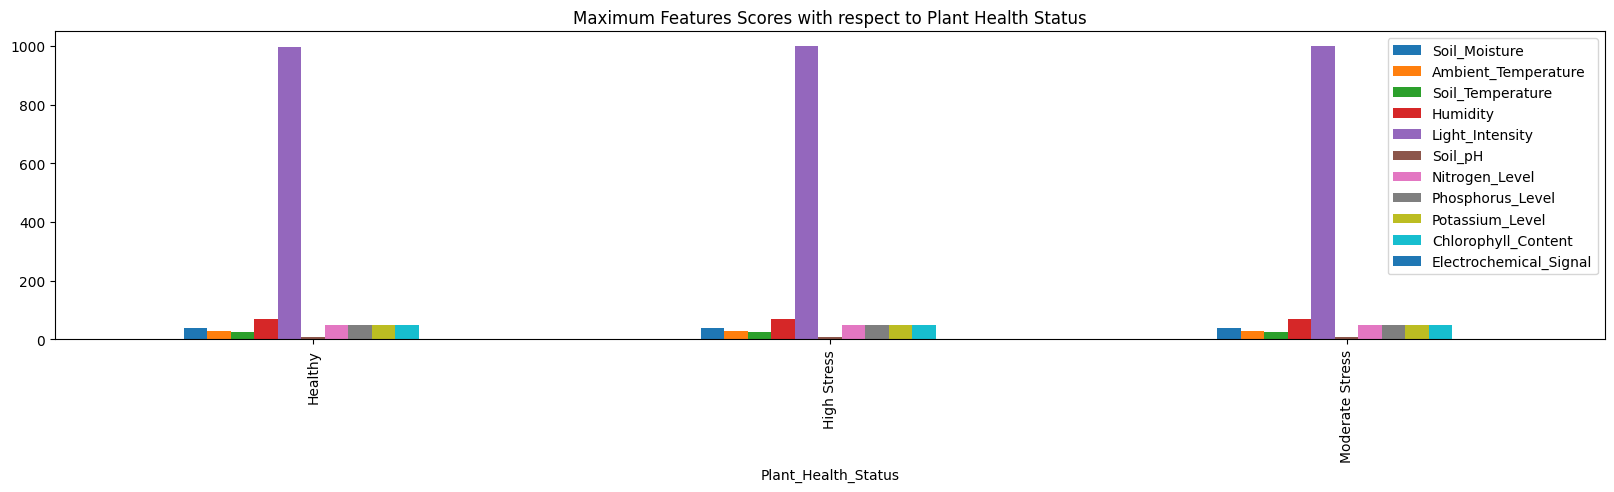

In [118]:

max_data.plot(kind="bar",figsize=(20,4),title="Maximum Features Scores with respect to Plant Health Status")

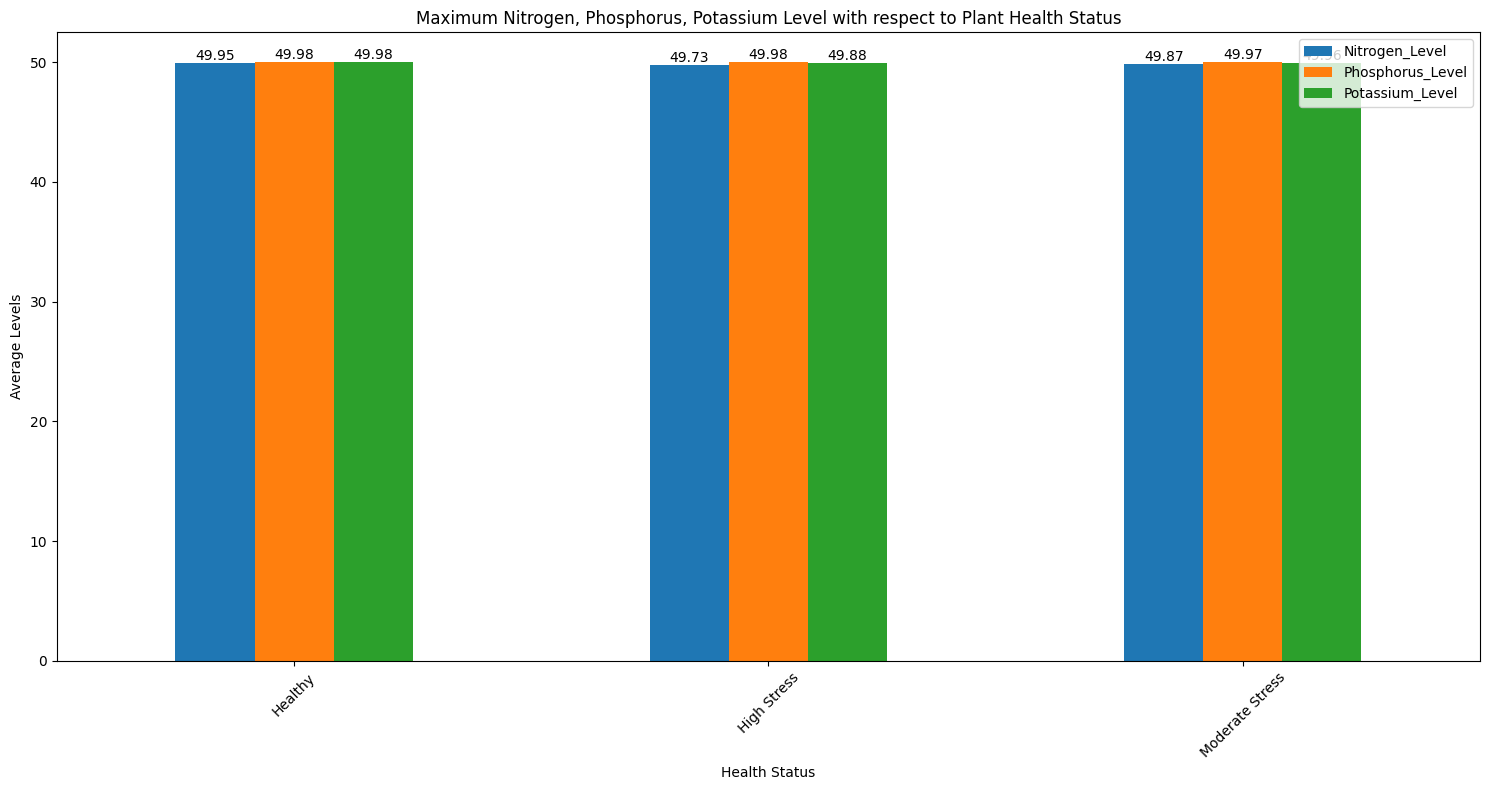

In [119]:

ax = max_data[["Nitrogen_Level","Phosphorus_Level","Potassium_Level"]].plot(kind="bar",figsize=(15,8),title="Maximum Nitrogen, Phosphorus, Potassium Level with respect to Plant Health Status")
# Annotating the bars with their values
for container in ax.containers:  # Loop through the bar containers
    ax.bar_label(container, fmt="%.2f")  # Format the label to show 2 decimal places

# Add labels for clarity
plt.xlabel("Health Status")
plt.ylabel("Average Levels")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

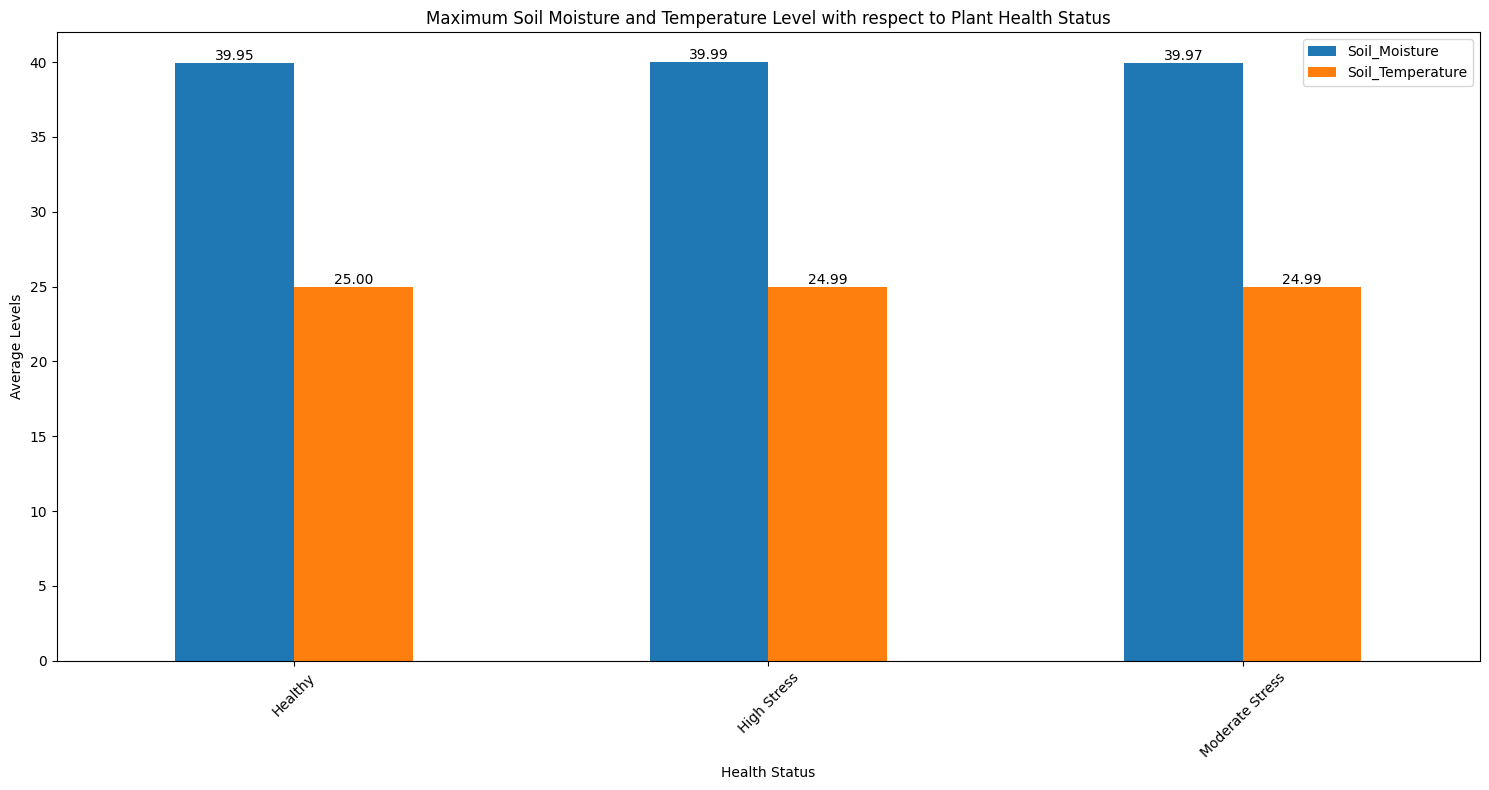

In [120]:

ax = max_data[["Soil_Moisture","Soil_Temperature"]].plot(kind="bar",figsize=(15,8),title="Maximum Soil Moisture and Temperature Level with respect to Plant Health Status")

# Annotating the bars with their values
for container in ax.containers:  # Loop through the bar containers
    ax.bar_label(container, fmt="%.2f")  # Format the label to show 2 decimal places

# Add labels for clarity
plt.xlabel("Health Status")
plt.ylabel("Average Levels")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [121]:
data.shape

(1200, 14)

In [122]:
data.groupby(by="Plant_Health_Status").max().reset_index().iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13]]

,Plant_Health_Status,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
0,Healthy,39.947928,29.990886,24.995929,69.812820,996.073556,7.497374,49.951136,49.980700,49.981945,49.911199,1.992460
1,High Stress,39.993164,29.967766,24.985652,69.957615,999.660376,7.497823,49.729588,49.976416,49.883189,49.958909,1.996116
2,Moderate Stress,39.974642,29.979443,24.992921,69.968871,999.856262,7.495422,49.871454,49.974407,49.958752,49.990811,1.994926


In [123]:
data.groupby(by="Plant_Health_Status").min().reset_index().iloc[:,[0,3,4,5,6,7,8,9,10,11,12,13]]

,Plant_Health_Status,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
0,Healthy,30.035475,18.018654,15.019124,40.450689,207.812018,5.513870,20.246250,10.110222,10.129972,20.039569,0.002376
1,High Stress,10.000724,18.003079,15.034650,40.036509,200.615482,5.507392,10.003650,10.017690,10.030398,20.025511,0.023117
2,Moderate Stress,20.006723,18.001993,15.003710,40.028758,201.736173,5.508954,15.002001,10.033289,10.000606,20.035069,0.006847


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [125]:
data["Plant_Health_Status"] = data["Plant_Health_Status"].map({'Healthy':2, 'High Stress':0, 'Moderate Stress':1})

In [126]:
x = data.drop(columns=["Timestamp","Plant_ID","Plant_Health_Status"])
y = data["Plant_Health_Status"]

smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x, y)


In [ ]:
# Now Splitting the Data

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [129]:
KNN = KNeighborsClassifier()
Random_forest = RandomForestClassifier()


KNN.fit(x_train,y_train)
Random_forest.fit(x_train,y_train)

print("KNN and Random Forest Model Successfully Trained")

KNN and Random Forest Model Successfully Trained


In [130]:
knn_predictions = KNN.predict(x_test)
random_for_predictions = Random_forest.predict(x_test)


In [131]:
print(" KNN Evaluation Report")
print(classification_report(y_test, knn_predictions))

 KNN Evaluation Report
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       117
           1       0.52      0.60      0.56       133
           2       0.77      0.72      0.74       125

    accuracy                           0.64       375
   macro avg       0.66      0.64      0.65       375
weighted avg       0.65      0.64      0.65       375



In [132]:
print("Random Forest Evaluation Report \n")
print(classification_report(y_test, random_for_predictions))

Random Forest Evaluation Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00       125

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

